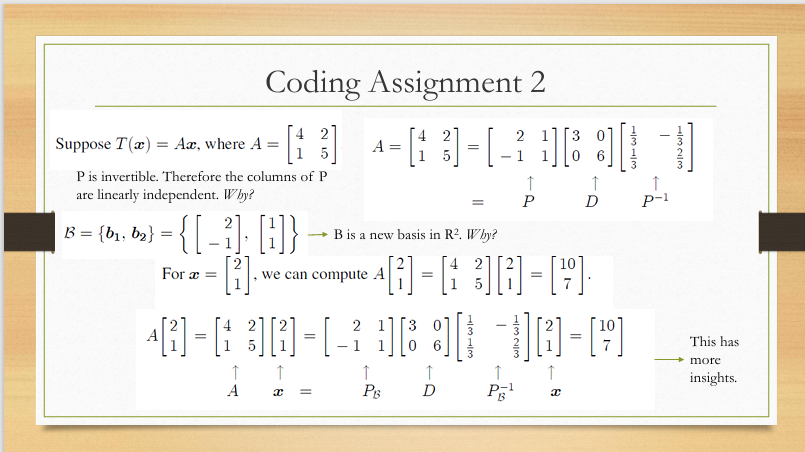


1.**P is invertible .Therefore columns of P are linearly independent .Why?**

Since P is the basis matrix . Basis are linearly independent and hence the P is invertible in R^2

2.**B is new basis in R^2. Why?**

Since the basis are linearly independent in R^2 .B is the new basis in R^2

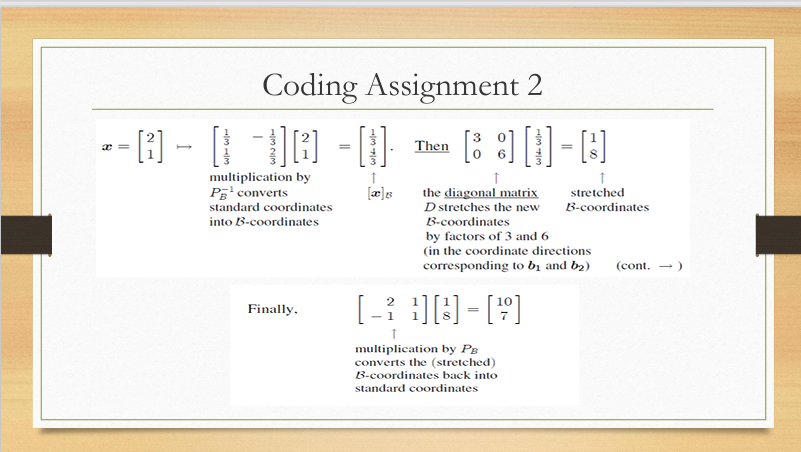

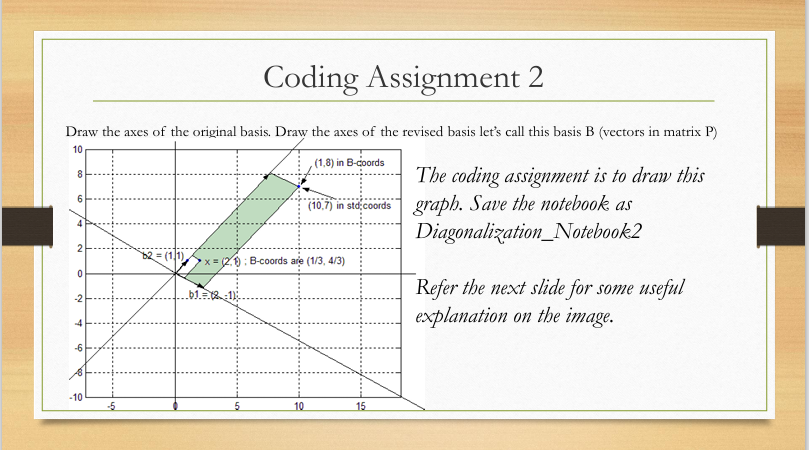

## Approach
#### Imports and Matrix Definition

- The code imports the necessary libraries: sympy for symbolic mathematics, numpy for numerical operations, and matplotlib.pyplot for plotting.
- It defines a 2x2 matrix A using sympy.Matrix.


#### Diagonalization

- The code performs diagonalization of the matrix A using the diagonalize() method from sympy.
- This results in two matrices: P (the basis matrix) and D (the diagonal matrix).
- The basis matrix P is modified by negating the first row and the third row.
- The inverse of the basis matrix P is computed and stored in P_inverse.


#### Vector Definition

A vector vector_x is defined as a column vector using sympy.Matrix.


#### Plot Function

 The plot_graph function is defined to visualize the transformation of the vector vector_x using the basis matrix P, its inverse P_inverse, and the - diagonal matrix .Inside the function, various calculations are performed:

- The column vectors of the basis matrix P are extracted and converted to NumPy arrays (basis_vector_1 and basis_vector_2).
- The vector vector_x is transformed into the basis of P (vector_in_basis).
- The transformed vector is stretched using the diagonal matrix D (stretched_vector).
- The final coordinates of the transformed and stretched vector in the standard basis are calculated (standard_coords).
- Coordinates of the vector and its stretched version along the basis vectors are computed.




#### Plotting

- A figure and axis are created using plt.subplots().
- Various arrows, lines, and annotations are plotted on the axis to visualize the basis vectors, the original vector, the transformed vector, and the stretched vector.
- Labels and annotations are added to the plot for better understanding.
- The plot limits and labels are set using ax.set_xlim(), ax.set_ylim(), ax.set_xlabel(), and ax.set_ylabel().
- The grid is displayed using plt.grid().
- Finally, the plot is shown using plt.show().


#### Function Call

The plot_graph function is called with the necessary arguments: P, P_inverse, D, and vector_x.

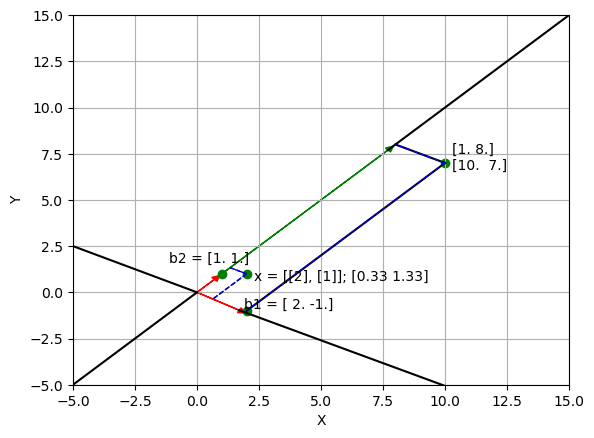

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A
A = sp.Matrix([[4, 2], [1, 5]])

# Perform diagonalization
P, D = A.diagonalize()

# Modify P as per the question
P[0] = -P[0]
P[2] = -P[2]

# Calculate the inverse of P
P_inverse = P.inv()

# Define the vector x
vector_x = sp.Matrix([[2], [1]])

def plot_graph(basis_matrix, basis_matrix_inverse, diagonal_matrix, vector):
    origin = np.array([0, 0])  # Start point

    # Extract column vectors from P and convert to numpy arrays
    basis_vector_1 = np.array(basis_matrix.col(0).evalf()).astype(np.float64).flatten()  # (2, -1)
    basis_vector_2 = np.array(basis_matrix.col(1).evalf()).astype(np.float64).flatten()  # (1, 1)

    # Perform matrix multiplications and convert to numpy arrays
    vector_in_basis = np.array((basis_matrix_inverse * vector).evalf()).astype(np.float64).flatten()  # x in the basis of P (1/3, 4/3) = (0.33, 1.33)
    stretched_vector = np.array((diagonal_matrix * (basis_matrix_inverse * vector)).evalf()).astype(np.float64).flatten()  # Stretched x (1, 8)
    standard_coords = np.array((basis_matrix * diagonal_matrix * basis_matrix_inverse * vector).evalf()).astype(np.float64).flatten()  # Standard coordinates (10, 7)

    # Coordinates along basis vectors
    stretched_vector_along_basis_2 = basis_vector_2 * stretched_vector[1]  # (8, 8)
    stretched_vector_along_basis_1 = basis_vector_1 * stretched_vector[0]  # (2, -1)
    vector_along_basis_2 = basis_vector_2 * vector_in_basis[1]  # (1.33, 1.33)
    vector_along_basis_1 = basis_vector_1 * vector_in_basis[0]  # (0.67, -0.33)

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot arrows
    ax.plot([stretched_vector_along_basis_2[0] - 0.3, 15 * basis_vector_2[0]], [stretched_vector_along_basis_2[1] - 0.3, 15 * basis_vector_2[1]], color='black')
    ax.plot([0, -11 * basis_vector_2[0]], [0, -11 * basis_vector_2[1]], color='black')
    ax.plot([basis_vector_1[0] - origin[0] - 0.3, 10 * basis_vector_1[0]], [basis_vector_1[1] - origin[1] + 0.03, 10 * basis_vector_1[1]], color='black')
    ax.plot([0, -4 * basis_vector_1[0]], [0, -4 * basis_vector_1[1]], color='black')

    ax.plot([stretched_vector_along_basis_2[0], standard_coords[0]], [stretched_vector_along_basis_2[1], standard_coords[1]], color='black')
    ax.plot([stretched_vector_along_basis_1[0], standard_coords[0]], [stretched_vector_along_basis_1[1], standard_coords[1]], color='black')

    ax.arrow(*origin, basis_vector_1[0] - origin[0] - 0.3, basis_vector_1[1] - origin[1] + 0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.arrow(*origin, basis_vector_2[0] - origin[0] - 0.3, basis_vector_2[1] - origin[1] - 0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.scatter(basis_vector_1[0], basis_vector_1[1], color='green')
    ax.scatter(basis_vector_2[0], basis_vector_2[1], color='green')
    
    # Annotate vectors along basis vectors
    plt.plot([vector_along_basis_1[0], vector[0,0]], [vector_along_basis_1[1], vector[1,0]], color='black', linestyle='--', linewidth=1)
    plt.plot([vector_along_basis_2[0], vector[0,0]], [vector_along_basis_2[1], vector[1,0]], color='black', linestyle='--', linewidth=1)

    ax.scatter(vector[0], vector[1], color='green')
    ax.scatter(standard_coords[0], standard_coords[1], color='green')
    ax.arrow(*(basis_vector_2[0], basis_vector_2[1]), stretched_vector_along_basis_2[0] - basis_vector_2[0] - 0.3, stretched_vector_along_basis_2[1] - basis_vector_2[1] - 0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')

    # Add labels near the arrow heads
    ax.annotate(f'b1 = {basis_vector_1}', xy=(basis_vector_1[0] + 1, basis_vector_1[1] - 1.01), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'b2 = {basis_vector_2}', xy=(basis_vector_2[0] - 1, basis_vector_2[1] - 0.5), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'x = {vector.tolist()}; {np.round(vector_in_basis, 2)}', xy=(vector[0], vector[1]), xytext=(5, -5), textcoords='offset points')
    ax.annotate(f'{stretched_vector}\n{standard_coords}', xy=(standard_coords[0], standard_coords[1]), xytext=(5, -5), textcoords='offset points')

    # Plot lines from green circles to b1 and b2
    plt.plot([vector[0, 0], vector_along_basis_1[0]], [vector[1, 0], vector_along_basis_1[1]], color='blue', linestyle='--', linewidth=1)
    plt.plot([vector[0, 0], vector_along_basis_2[0]], [vector[1, 0], vector_along_basis_2[1]], color='blue', linestyle='--', linewidth=1)
    plt.plot([standard_coords[0], stretched_vector_along_basis_1[0]], [standard_coords[1], stretched_vector_along_basis_1[1]], color='blue', linestyle='--', linewidth=1)
    plt.plot([standard_coords[0], stretched_vector_along_basis_2[0]], [standard_coords[1], stretched_vector_along_basis_2[1]], color='blue', linestyle='--', linewidth=1)

    # Set limits and labels
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show plot
    plt.grid()
    plt.show()

# Perform diagonalization and plot the transformation
plot_graph(P, P_inverse, D, vector_x)